In [2]:
import numpy as np 
import implementations as imp
import helpers as hlp
import preprocessing as pre
import os

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load and clean data

In [3]:
cwd = os.getcwd()
path = cwd + '/dataset_to_release'

In [4]:
x_train_, x_test_, y_train_, train_ids_, test_ids_ = hlp.load_csv_data(path)

In [5]:
x = x_train_.copy()
x_submit = x_test_.copy()
y = y_train_.copy()

x_train, y_train, x_test, y_test = pre.split_data(x, y, 0.8)  

In [6]:
correlation_thr = 0.8
nan_thr = 0.8
std_thr = 0.1

x_train_cleaned, x_test_cleaned = pre.clean_data(x_train, x_test, correlation_thr, nan_thr, std_thr)

Number of columns with more than 0.8 NaN: 116
Number of columns with std < 0.1: 10
Number of perfectly correlated columns: 33
Columns to drop: [2, 3, 8, 9, 10, 11, 12, 14, 18, 19, 21, 22, 41, 49, 55, 64, 74, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 219, 224, 225, 226, 240, 244, 247, 248, 249, 257, 262, 263, 264, 265, 273, 274, 275, 278, 279, 280, 281, 282, 283, 284, 288, 298, 306, 307, 308, 309, 310, 311, 312, 316, 317]
Handling NaN values...
Handling NaN values...
Number of perfectly correlated columns after c

In [88]:
X_train, X_test = pre.clean_data(x, x_submit, correlation_thr, nan_thr, std_thr)

Number of columns with more than 0.8 NaN: 116
Number of columns with std < 0.1: 10
Number of perfectly correlated columns: 33
Columns to drop: [2, 3, 8, 9, 10, 11, 12, 14, 18, 19, 21, 22, 41, 49, 55, 64, 74, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 219, 224, 225, 226, 240, 244, 247, 248, 249, 257, 262, 263, 264, 265, 273, 274, 275, 278, 279, 280, 281, 282, 283, 284, 288, 298, 306, 307, 308, 309, 310, 311, 312, 316, 317]
Handling NaN values...
Handling NaN values...
Number of perfectly correlated columns after c

In [89]:
X_train.shape, X_test.shape

((328135, 162), (109379, 162))

# Gradient Descent

### Hyperparameter tuning


In [82]:
max_iters = 25
gd_gammas = np.linspace(0.001, 0.25,10)
w_initial = np.zeros(x_train_cleaned.shape[1])
gd_losses = np.zeros(len(gd_gammas))
for i, gamma in enumerate(gd_gammas):
    losses, ws = imp.gradient_descent(y_train, x_train_cleaned, w_initial, max_iters, gamma) 
    print(np.mean(losses))   
    gd_losses[i] = np.mean(losses)




0.49729081910133016
0.4810129032027986
0.47888369659401553
0.47803208986552215
0.4775873423936811
0.47733190705551576
0.47719370525300414
0.47716370036253564
0.47734095794948056
0.47981561862309674


In [83]:
best_gd_gamma = gd_gammas[np.argmin(gd_losses)]
print('Best gamma:', best_gd_gamma)

Best gamma: 0.19466666666666665


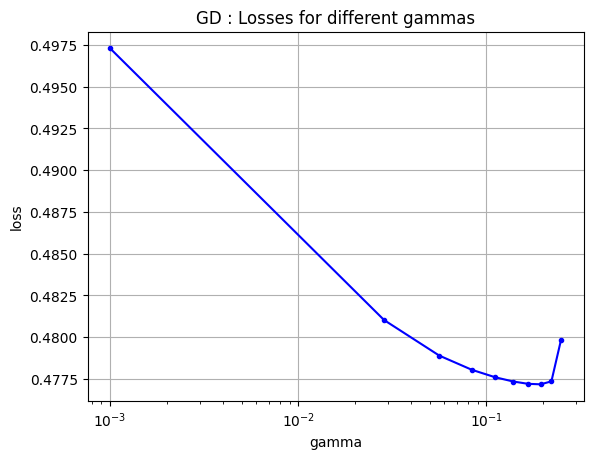

In [84]:
# plot losses for different gammas
import matplotlib.pyplot as plt
plt.figure()
plt.semilogx(gd_gammas, gd_losses, marker=".", color='b', label='loss')
plt.xlabel("gamma")
plt.ylabel("loss")
plt.title("GD : Losses for different gammas")
# plt.legend(loc=2)
plt.grid(True)
plt.show()


### Testing

In [85]:
best_gd_losses, best_gd_ws= imp.gradient_descent(y_train, x_train_cleaned, w_initial, max_iters, best_gd_gamma)

In [86]:
best_w = best_gd_ws[np.argmin(best_gd_losses)]

In [87]:
# test the model
print('Loss:', imp.compute_loss(y_test, x_test_cleaned, best_w))

Loss: 0.4782084719424128


### Predictions

In [90]:
max_iters = 25
gd_gammas = np.linspace(0.001, 0.25,10)
w_initial = np.zeros(X_train.shape[1])
gd_losses = np.zeros(len(gd_gammas))
for i, gamma in enumerate(gd_gammas):
    losses, ws = imp.gradient_descent(y, X_train, w_initial, max_iters, gamma) 
    print(np.mean(losses))   
    gd_losses[i] = np.mean(losses)

0.49732910821316634
0.48127369630842287
0.4791694987633546
0.4783272572322382
0.47788703256500376
0.4776339856039327
0.477496976114938
0.4774674286507496
0.477646769164094
0.48037356685015753


In [106]:
gamma = gd_gammas[np.argmin(gd_losses)]
l, w = imp.gradient_descent(y, X_train, w_initial, max_iters, gamma)
w = w[np.argmin(l)]
y_pred = X_test @ w
y_pred_GD = pre.threshold(y_pred)
hlp.create_csv_submission(test_ids_, y_pred_GD, "y_pred_GD.csv")


In [104]:
X_test.shape, len(w[0])

((109379, 162), 162)

# Stochastic Gradient Descent

### Hyperparameter tuning

In [68]:
max_iters = 25
gammas =  np.linspace(0.0001, 0.2, 20)
batch_size = [32,64,128,256,512,1024]
w_initial = np.zeros(x_train_cleaned.shape[1])
losses = np.zeros((len(gammas), len(batch_size)))

for i, gamma in enumerate(gammas):
    for j, batch in enumerate(batch_size):
        sgd_losses, sgd_ws = imp.stochastic_gradient_descent(y_train, x_train_cleaned, w_initial, batch, max_iters, gamma) 
        print(np.mean(sgd_losses))   
        losses[i][j]= np.mean(sgd_losses)
  



SGD iter. 0/24: loss=0.4999994039291301, w0=4.053075369548897e-06, w1=2.1748989908782275e-06
SGD iter. 1/24: loss=0.49998093677643196, w0=2.019154703109724e-05, w1=8.591122563299817e-06
SGD iter. 2/24: loss=0.4999563252396724, w0=3.2821233077277486e-05, w1=-1.5250933660219279e-06
SGD iter. 3/24: loss=0.4999628822521359, w0=5.2842581665534315e-05, w1=2.2157384014804634e-05
SGD iter. 4/24: loss=0.49995241015529124, w0=5.37799876965897e-05, w1=3.712336174569166e-05
SGD iter. 5/24: loss=0.49994362465992387, w0=6.73723393002517e-05, w1=2.4214070513888943e-05
SGD iter. 6/24: loss=0.4999209065993365, w0=7.335558606903006e-05, w1=4.868595187310602e-06
SGD iter. 7/24: loss=0.49989174923616875, w0=0.0001086061941446338, w1=-7.2324276902056925e-06
SGD iter. 8/24: loss=0.49986368838230405, w0=0.00010526245193766911, w1=-3.9068354927104565e-06
SGD iter. 9/24: loss=0.4998240149729264, w0=9.390633303067277e-05, w1=-1.959021417900105e-06
SGD iter. 10/24: loss=0.4997975474201685, w0=0.00011232659235361

In [69]:
# find best gamma and batch size combination
min_loss = np.min(losses)
min_loss_index = np.where(losses == min_loss)
best_gamma = gammas[min_loss_index[0][0]]
best_batch = batch_size[min_loss_index[1][0]]
print('Best gamma:', best_gamma)
print('Best batch size:', best_batch)
print('Min loss:', min_loss)

Best gamma: 0.0632263157894737
Best batch size: 1024
Min loss: 0.4805206198699395


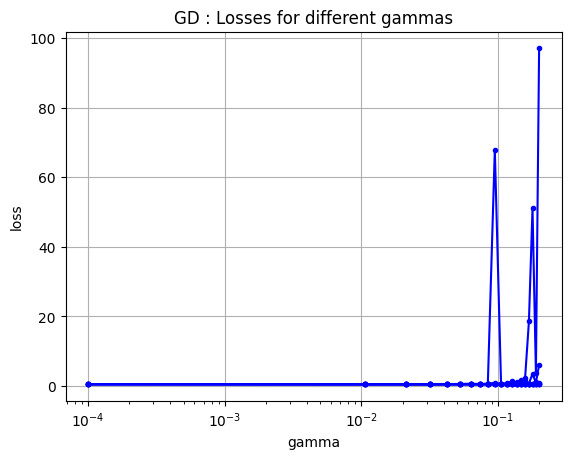

In [71]:
# plot losses for different gammas
plt.figure()
plt.semilogx(gammas, losses, marker=".", color='b', label='loss')
plt.xlabel("gamma")
plt.ylabel("loss")
plt.title("GD : Losses for different gammas")
# plt.legend(loc=2)
plt.grid(True)
plt.show()


### Testing

In [73]:
sgd_losses, sgd_ws = imp.stochastic_gradient_descent(y_train, x_train_cleaned, w_initial, best_batch, max_iters, best_gamma)
best_w = sgd_ws[np.argmin(sgd_losses)]
loss = imp.compute_loss(y_test, x_test_cleaned, best_w)
print('Loss:', loss)

Loss: 0.48157163136401543


# Least squares

### Testing (no tuning necessary)

In [107]:
w_least, loss_least = imp.least_squares(y_train, x_train_cleaned)
loss = imp.compute_loss(y_test, x_test_cleaned, w_least)
print('Loss:', loss)


Loss: 0.47846300865161434
